In [14]:
# IMPORT DATA

import pandas as pd

df = pd.read_csv('dataset_2277.csv')
df.dropna(inplace=True)

player_dfs = []
for player in df['player_name'].unique():
    player_df = df[df['player_name'] == player].copy()

    player_df['prev_x-ma5'] = player_df['x-ma5'].shift(1)
    player_df['prev_x-ma20'] = player_df['x-ma20'].shift(1)

    player_dfs.append(player_df)

df = pd.concat(player_dfs)
df.dropna(inplace=True)

print(len(df))
print(df)

1709
      player_name          opp_name  player_elo  opp_elo  elo_diff  color  \
20    BIG_TONKA_T          Huss855c        1444     1442         2  False   
21    BIG_TONKA_T      waleedtahir6        1436     1386        50  False   
22    BIG_TONKA_T           JHH1953        1443     1415        28   True   
23    BIG_TONKA_T             Al045        1434     1532       -98   True   
24    BIG_TONKA_T        itobandito        1428     1403        25  False   
...           ...               ...         ...      ...       ...    ...   
2272     1lachout          Izgorsek        1412     1410         2   True   
2273     1lachout            Rx1235        1404     1363        41   True   
2274     1lachout             agnks        1395     1358        37  False   
2275     1lachout      sebastienBCN        1386     1292        94  False   
2276     1lachout  Metin_ISTR_Hurin        1392     1412       -20  False   

      x-ma5  x-ma20  opp_x-ma5  opp_x-ma20  won  prev_x-ma5  prev_x-ma

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Assuming your dataframe is named df
X = df[['elo_diff', 'x-ma5', 'x-ma20', 'prev_x-ma5', 'prev_x-ma20', 'opp_x-ma5', 'opp_x-ma20', 'color']]
y = df['won']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy_plot(accuracies, save_images=False):
    best_accuracy = np.max(accuracies[0])
    for i in range(1, len(accuracies)):
        best_accuracy = max(best_accuracy, np.max(accuracies[i]))
    best_epoch = np.argmax(accuracies) + 1
    print('Best accuracy:', best_accuracy, 'at epoch', best_epoch)

    # Plot accuracies against epochs
    plt.rcParams['lines.linewidth'] = 2
    for i in range(len(accuracies)):
        plt.plot(range(1, len(accuracies[i]) + 1), accuracies[i], zorder=3)

    # Comparison lines
    plt.rcParams['lines.linewidth'] = 1.25
    plt.axhline(y=0.5, color='r', linestyle='--', label="Coinflip", zorder=2)
    plt.axhline(y=0.517, color='g', linestyle='--', label="Naive", zorder=2)
    plt.axhline(y=best_accuracy, color='b', linestyle='--', label="Best", zorder=2)

    # Labels and settings
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch (each model)')
    plt.ylim(0.40, 0.65)
    plt.legend()
    plt.grid(alpha=0.55)

    num_ticks = 6
    tick_positions = np.linspace(1, len(accuracies[0]), num_ticks, endpoint=True)
    rounded_ticks = np.round(tick_positions)
    plt.xticks(ticks=tick_positions, labels=rounded_ticks)

    if save_images:
        plt.savefig('accuracy_plot_each_model.png')

    plt.show()

    # plot average accuracy
    plt.rcParams['lines.linewidth'] = 2
    plt.plot(range(1, len(accuracies[0]) + 1), np.mean(accuracies, axis=0), zorder=3)

    # best average accuracy
    best_accuracy = np.max(np.mean(accuracies, axis=0))
    best_epoch = np.argmax(np.mean(accuracies, axis=0)) + 1
    print('Best accuracy:', best_accuracy, 'at epoch', best_epoch)

    # Comparison lines
    plt.rcParams['lines.linewidth'] = 1.25
    plt.axhline(y=0.5, color='r', linestyle='--', label="Coinflip", zorder=2)
    plt.axhline(y=0.517, color='g', linestyle='--', label="Naive", zorder=2)
    plt.axhline(y=best_accuracy, color='b', linestyle='--', label="Best", zorder=2)

    # Labels and settings
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch (average)')
    plt.ylim(0.40, 0.65)
    plt.legend()
    plt.grid(alpha=0.55)

    num_ticks = 6
    tick_positions = np.linspace(1, len(accuracies[0]), num_ticks, endpoint=True)
    rounded_ticks = np.round(tick_positions)
    plt.xticks(ticks=tick_positions, labels=rounded_ticks)

    if save_images:
        plt.savefig('accuracy_plot_average.png')

    plt.show()


In [24]:
model_accuracies = []

for i in range(5):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 25

    accuracies = []

    for epoch in range(num_epochs):
        model.fit(X_train, y_train, epochs=1, batch_size=128, verbose='0')

        loss, accuracy = model.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    model_accuracies.append(accuracies)

11/11 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5292


Best accuracy: 0.5789473652839661 at epoch 85


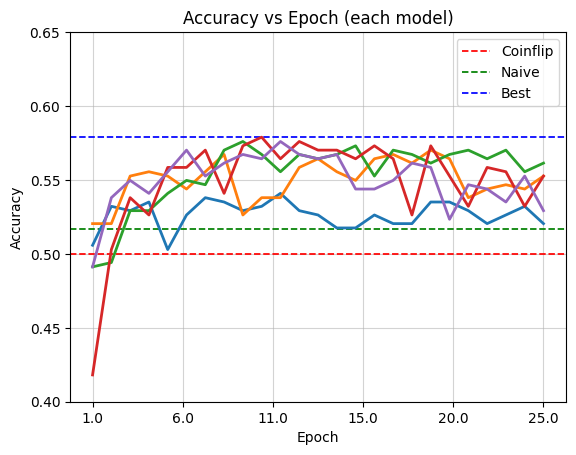

Best accuracy: 0.559649121761322 at epoch 12


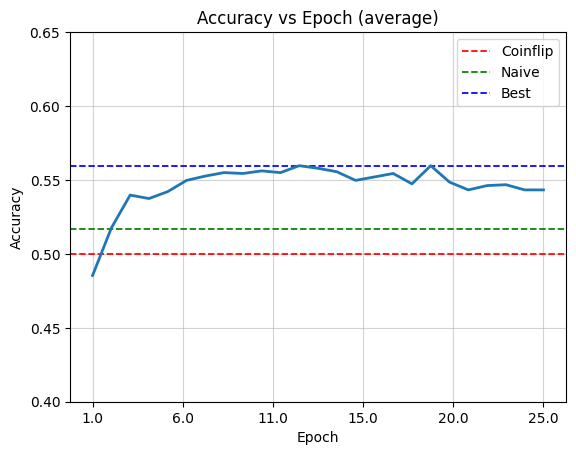

In [29]:
accuracy_plot(model_accuracies, save_images=True)